<a href="https://colab.research.google.com/github/raudh1/ShellModels/blob/main/Shell_model_vulpiani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from scipy.integrate import solve_ivp


from scipy.integrate import complex_ode
from matplotlib import pyplot
import seaborn as sns
from scipy import stats
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


**SABRA MODEL [article](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.58.1811) written by Victor S. L’vov et al. , with parameters based on an [article](https://is.gd/S0vxhi) written by M. H. Jensen, G. Paladin, and A. Vulpiani**

$$u_n=u_n(t)$$
$$\dot{u}_{n}=i\left(a k_{n+1} u_{n+2} u_{n+1}^{*}+b k_{n} u_{n+1} u_{n-1}^{*}-c k_{n-1} u_{n-1} u_{n-2}\right)-\nu k_{n}^{2} u_{n}+f_{n},$$ \\

$$a+b+c=0, k_n=k_0\lambda^n, \lambda=2 $$ \\


$$\text{Boundary Condictions:  }b_{1}=b_{N}=c_{1}=c_{2}=a_{N-1}=a_{N}=0$$

$$\text{Initial Condictions:  }u_n(0)=0.001(1+i)k_n^{-1}$$

**Parameters**

$N=19$

$k_0=2^{-4}$

$f_n=\delta_{n,4}(1+i)5\cdot10^{-3}$

$\nu=10^{-6}$

**Others quantities definition in [SABRA](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.58.1811)**


$\text{As a consequence of the Kolmogorv Similarity hypotesis:}$

$$\delta u_n (l) \sim (\bar{\epsilon}l)^{1/3} $$

$$\text{With }l=\eta=\Big(\frac{\nu^3}{\bar{\epsilon}}\Big)^{1/4}\text{ Kolmogorov Scale  natural time at a scale }\eta : \tau_{\eta}=\Big(\frac{\nu}{\bar{\epsilon}}\Big)^{1/2}$$






In [ ]:
nu=1e-6
fn=(1.+1j)*5.e-3
eta=np.power(nu**3/(np.abs(fn)),1/4.)

taueta=np.power(nu/(np.abs(fn)),0.5)
print('Dissipation Scale = ',  1/eta,'Kolmogorov Time = ',  taueta)

Dissipation Scale =  9170.040432046713 Kolmogorov Time =  0.01189207115002721


In [ ]:
N=19
knn=np.power(2,np.arange(N+4))
kn=knn*np.power(2,-4.)
1/(kn[2:-2][1]**(2/3.))

1.5874010519681994

**Model definition**

In [ ]:
def shellmodel(t, u):
      nu=1e-6
      an=np.ones(N+4)
      bn=-0.5*np.ones(N+4)
      cn=-0.5*np.ones(N+4)
      fn=np.zeros(N+4,dtype=complex)
      #cn=np.zeros(N+4)
      #cn=(1.-bn)


      an[N+3]=0.
      an[N+2]=0.

      bn[0]=0.
      bn[N+3]=0.

      cn[0]=0.
      cn[1]=0.

      fn[4]=(1.+1.j)*5.e-3
      res=np.zeros((N+4),dtype=complex)
      #a,b,c=-1.,0.5,0.5
      #print((2,N+2),res.shape[0])

      eta=np.power(nu**3/(np.abs(fn[3])),1/4.)
      #print(1/eta)

      for i in range(2, N+2):
          #SABRA U
          #print(i)                                                                        
          #                                                                                       
          #                                                                                       
          res[i]=1j*(an[i-2]*kn[i+1]*u[i+2]*np.conjugate(u[i+1])+bn[i-2]*kn[i]*u[i+1]*np.conjugate(u[i-1])-cn[i-2]*kn[i-1]*u[i-1]*u[i-2])+fn[i]-nu*kn[i]**2*u[i] 
      return  res


**Generate Trajectories**

In [ ]:
"""
!!! Very long Evaluation Time... do not run !!! 
 
"""

Un=1e-3*kn**(-1)*(1.+1.j)*np.ones(N+4,dtype=complex)
#Un2=np.load('./Uf.npy')
#Un2=Un2[:,-1]
#u0=1j*np.ones((2*(N+4)))
u0=np.array(Un)
#u0=u0.reshape(1,2*(N+4))
#u20=2*np.ones(N)

t=0
r = complex_ode(shellmodel).set_integrator('vode', method='bdf',order='2')
r.set_initial_value(u0,0)
t1 = 500
dt = 1e-2
#print(r.successful(),r.t,t1)
i=0
a=[]
while r.successful() and r.t < t1:
      r.t
      a.append(r.integrate(r.t+dt))
      i=i+1
      if (i%50000==0):
        print(np.mean(np.sum((np.transpose(a)*np.conj(np.transpose(a))).real,axis=0)))
        print(i)
Uf=np.transpose(a)
#np.save('./Uf_N19_'+str(i)+'_points',Uf)

*Load Trajectories from drive*

In [ ]:
path='./drive/MyDrive/exp/ShellModel/'
Uf=np.load(path+'Uf_N19_40001_points.npy')

**Energy of the System**

$$E=\frac{1}{2}\sum_{n=0}^N|u_n|^2$$

In [ ]:
Uf2=Uf[2:-2]
Energy=0.5*np.sum((Uf2*np.conj(Uf2)).real,axis=0)
plt.plot((Energy))
#plt.loglog()
#plt.plot(np.sum((Un*np.conj(Un)).real,axis=0))

#plt.ylim(Energy[0],4.266e-5)
#plt.xlim(0,20)
plt.show()
np.save('./En_N19_'+str(i)+'_points',Uf)


*Mean **Energy** size of sampling = 10*

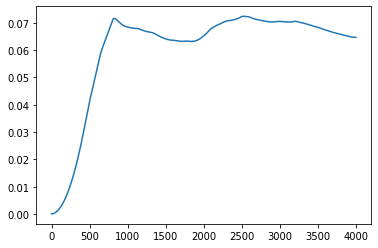

In [ ]:
a=[]
for i in range(10,len(Energy[:]),10):
  a.append(np.mean(Energy[0:i]))
  #print(i)
plt.plot(a)

In [ ]:
"""
less precise estime of epsilon (rate of dissipation of energy)
"""
epsilon=2*np.real(np.mean(np.conj(Uf[4])*fn))
epsilon               


0.0020031494911618504

In [ ]:
eta=np.power(nu**3/(epsilon),1/4.)
eta2=np.power(nu**3/(np.abs(fn)),1/4.)  # approx def of epsilon # 
print(1/eta2,1/eta)

6690.0342360803115 9170.040432046713


In [ ]:
Uf_stat=Uf[:,10000:] # Spectrum Evaluation starting from 10,000 steps (when the energy is stable)#

**SPECTRUM KOLMOGOROV 41: -5/3 LAW**

$$E(k_n)=\frac{1}{2 k_n}\langle|u_n|^2{\rangle}_{t}$$


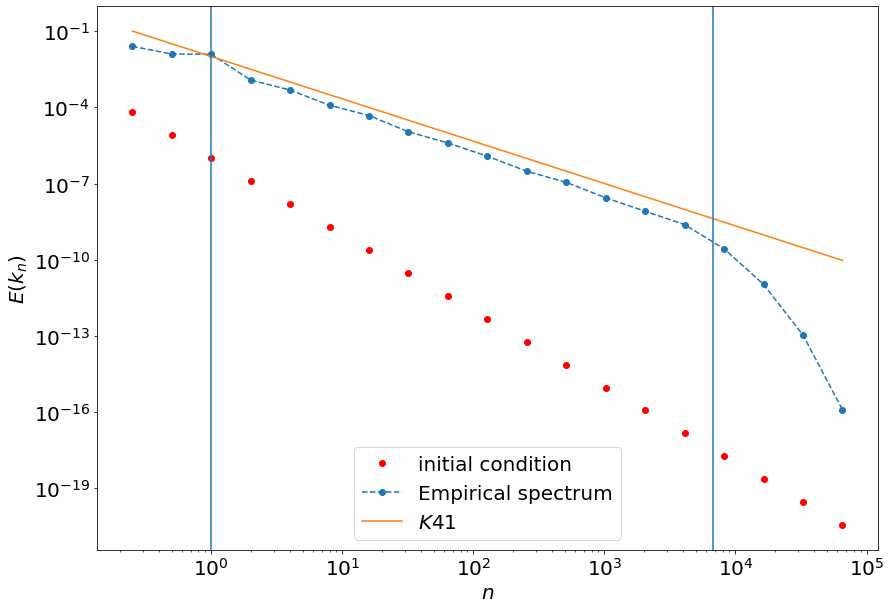

In [ ]:
plt.figure(figsize=(14,10))
plt.plot(kn[2:-2],(Un*np.conj(Un)).real[2:-2]/(2*kn[2:-2]),'ro',label='initial condition')
plt.plot(kn[2:-2],(np.mean((Uf_stat*np.conj(Uf_stat)),1).real)[2:-2]/(2*kn[2:-2]),'o--',label='Empirical spectrum')
#plt.plot(kn[2:-2],(np.mean((Uf_stat_old*np.conj(Uf_stat_old)),1).real)[2:-2],'o--',label='S2')

plt.plot(kn[2:-2],1e-2*kn[2:-2]**(-5/3.),label=r'$K41$')
plt.axvline(x=1/eta)
plt.axvline(x=kn[4])
plt.xlabel(r'$n$', fontsize=20)
plt.ylabel(r'$E(k_n)$', fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#pyplot.annotate(r'$k_{in}$',(kn[3],1e-19),fontsize='20')
#pyplot.annotate(r'$k_{out}$',(1/eta,1e-19),fontsize='20')
plt.loglog()
#plt.savefig('./K41_shell_model_N=20')
plt.show()
#np.save('./sol_0.02.npy',(np.mean((Uf*np.conj(Uf)),1).real)[2:-2])

Save The Dataset used to compute the spectrum

In [ ]:
 np.save('./Uf_stat',Uf_stat)

**Structure functions**

Computed with this formula : $S_q=⟨|u_n|^q⟩_t$

In [ ]:
plt.figure(figsize=(14,10))
Uf3=np.abs(Uf[2:-2])
S1=np.mean(((Uf3)),1)
S2=np.mean((Uf3)**2,1)
S3=np.mean((Uf3)**3,1)
S4=np.mean((Uf3)**4,1)
S5=np.mean((Uf3)**5,1)
S6=np.mean((Uf3)**6,1)
S7=np.mean((Uf3)**7,1)
S8=np.mean((Uf3)**8,1)
S9=np.mean((Uf3)**9,1)
S10=np.mean((Uf3)**10,1)
S12=np.mean((Uf3)**12,1)
S14=np.mean((Uf3)**14,1)


print(len(S2),len(S4)) 

19 19


<Figure size 1008x720 with 0 Axes>

**Empirical Structure Functions VS K-41 Structure Functions**



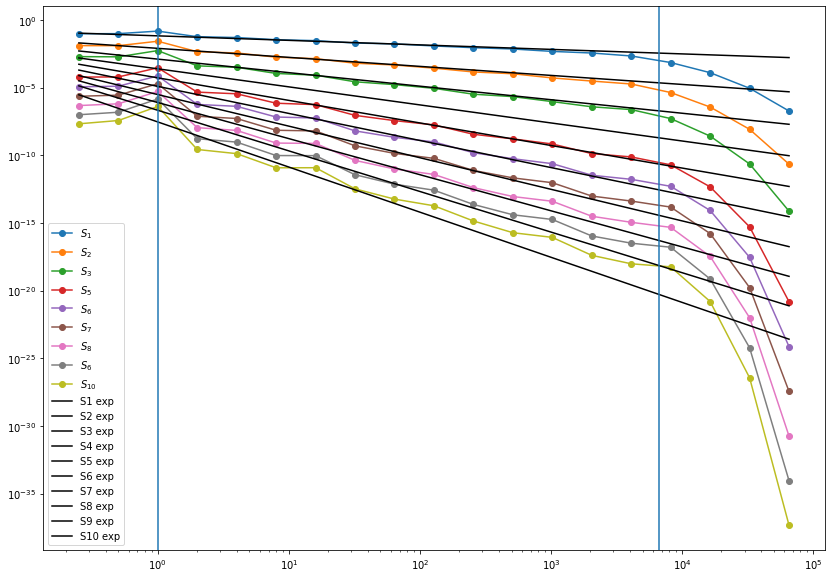

In [ ]:
plt.figure(figsize=(14,10))

#plt.plot(kn[2:-2],S1,'o-',label='S1')
plt.plot((kn[2:-2]),(S1),'o-',label=r'$S_1$')
plt.plot((kn[2:-2]),(S2),'o-',label=r'$S_2$')
plt.plot((kn[2:-2]),(S3),'o-',label=r'$S_3$')
plt.plot((kn[2:-2]),(S5),'o-',label=r'$S_5$')
plt.plot((kn[2:-2]),(S6),'o-',label=r'$S_6$')
plt.plot((kn[2:-2]),(S7),'o-',label=r'$S_7$')
plt.plot((kn[2:-2]),(S8),'o-',label=r'$S_8$')
plt.plot((kn[2:-2]),(S9),'o-',label=r'$S_6$')
plt.plot((kn[2:-2]),(S10),'o-',label=r'$S_{10}$')
#plt.plot((kn[2:-2]),(S12),'o-',label=r'$S_{12}$')
#plt.plot((kn[2:-2]),(S14),'o-',label=r'$S_{14}$')


plt.plot(kn[2:-2],np.mean(S1[:8])*kn[2:-2]**(-1/3.),label='S1 exp',color='black')
plt.plot(kn[2:-2],np.mean(S2[:8])*kn[2:-2]**(-2/3.),label='S2 exp',color='black')
plt.plot(kn[2:-2],np.mean(S3[:8])*kn[2:-2]**(-3/3.),label='S3 exp',color='black')
plt.plot(kn[2:-2],np.mean(S4[:8])*kn[2:-2]**(-4/3.),label='S4 exp',color='black')
plt.plot(kn[2:-2],np.mean(S5[:8])*kn[2:-2]**(-5/3.),label='S5 exp',color='black')
plt.plot(kn[2:-2],np.mean(S6[:8])*kn[2:-2]**(-6/3.),label='S6 exp',color='black')
plt.plot(kn[2:-2],np.mean(S7[:8])*kn[2:-2]**(-7/3.),label='S7 exp',color='black')
plt.plot(kn[2:-2],np.mean(S8[:8])*kn[2:-2]**(-8/3.),label='S8 exp',color='black')
plt.plot(kn[2:-2],np.mean(S9[:8])*kn[2:-2]**(-9/3.),label='S9 exp',color='black')
plt.plot(kn[2:-2],np.mean(S10[:2])*kn[2:-2]**(-10/3.),label='S10 exp',color='black')
#plt.plot(kn[2:-2],np.mean(S12[:1])*kn[2:-2]**(-12/3.),label='S12 exp',color='black')
#plt.plot(kn[2:-2],np.mean(S14[:1])*kn[2:-2]**(-14/3.),label='S14 exp',color='black')


plt.xlabel(r'$\log(n)$',fontsize=15)
plt.ylabel(r'$\log(S_n)$',fontsize=30)
plt.legend(fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#plt.ylim(5e-23,5e-1)
plt.axvline(x=1/eta)
plt.axvline(x=kn[4])
plt.loglog()#basex=2, basey=2)
plt.legend()
plt.show()

**STRUCTURE FUNCTION FIT**

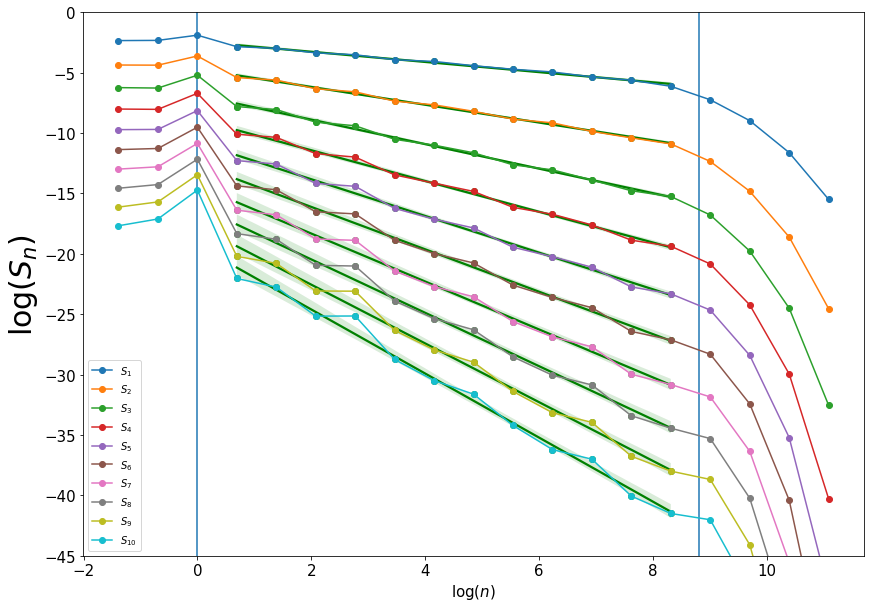

In [ ]:
plt.figure(figsize = (14,10))
plt.axvline(x=np.log(1/eta))
plt.axvline(x=np.log(kn[4]))

ax = sns.regplot(x=np.log(kn[2:-2][3:-4]), y=np.log(S1[3:-4]), color="g")
plt.plot(np.log(kn[2:-2]),np.log(S1),'o-',label=r'$S_1$')

ax = sns.regplot(x=np.log(kn[2:-2][3:-4]), y=np.log(S2[3:-4]), color="g")
plt.plot(np.log(kn[2:-2]),np.log(S2),'o-',label=r'$S_2$')

ax = sns.regplot(x=np.log(kn[2:-2][3:-4]), y=np.log(S3[3:-4]), color="g")
plt.plot(np.log(kn[2:-2]),np.log(S3),'o-',label=r'$S_3$')

ax = sns.regplot(x=np.log(kn[2:-2][3:-4]), y=np.log(S4[3:-4]), color="g")
plt.plot(np.log(kn[2:-2]),np.log(S4),'o-',label=r'$S_4$')

ax = sns.regplot(x=np.log(kn[2:-2][3:-4]), y=np.log(S5[3:-4]), color="g")
plt.plot(np.log(kn[2:-2]),np.log(S5),'o-',label=r'$S_5$')

ax = sns.regplot(x=np.log(kn[2:-2][3:-4]), y=np.log(S6[3:-4]), color="g")
plt.plot(np.log(kn[2:-2]),np.log(S6),'o-',label=r'$S_6$')

ax = sns.regplot(x=np.log(kn[2:-2][3:-4]), y=np.log(S7[3:-4]), color="g")
plt.plot(np.log(kn[2:-2]),np.log(S7),'o-',label=r'$S_7$')

ax = sns.regplot(x=np.log(kn[2:-2][3:-4]), y=np.log(S8[3:-4]), color="g")
plt.plot(np.log(kn[2:-2]),np.log(S8),'o-',label=r'$S_8$')

ax = sns.regplot(x=np.log(kn[2:-2][3:-4]), y=np.log(S9[3:-4]), color="g")
plt.plot(np.log(kn[2:-2]),np.log(S9),'o-',label=r'$S_9$')

ax = sns.regplot(x=np.log(kn[2:-2][3:-4]), y=np.log(S10[3:-4]), color="g")
plt.plot(np.log(kn[2:-2]),np.log(S10),'o-',label=r'$S_{10}$')


plt.xlabel(r'$\log(n)$',fontsize=15)
plt.ylabel(r'$\log(S_n)$',fontsize=30)
plt.legend(fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(-45,0)

plt.legend(fontsize=15)
plt.show()

**FIT SCALING EXPONENTS FROM THE MODEL**

In [ ]:
S1f=stats.linregress(np.log(kn[2:-2][3:-4]),np.log(S1[3:-4]))
S2f=stats.linregress(np.log(kn[2:-2][3:-4]),np.log(S2[3:-4]))
S3f=stats.linregress(np.log(kn[2:-2][3:-4]),np.log(S3[3:-4]))
S4f=stats.linregress(np.log(kn[2:-2][3:-4]),np.log(S4[3:-4]))
S5f=stats.linregress(np.log(kn[2:-2][3:-4]),np.log(S5[3:-4]))
S6f=stats.linregress(np.log(kn[2:-2][3:-4]),np.log(S6[3:-4]))
S7f=stats.linregress(np.log(kn[2:-2][3:-4]),np.log(S7[3:-4]))
S8f=stats.linregress(np.log(kn[2:-2][3:-4]),np.log(S8[3:-4]))
S9f=stats.linregress(np.log(kn[2:-2][3:-4]),np.log(S9[3:-4]))
S10f=stats.linregress(np.log(kn[2:-2][3:-4]),np.log(S10[3:-4]))

**Intermittency**

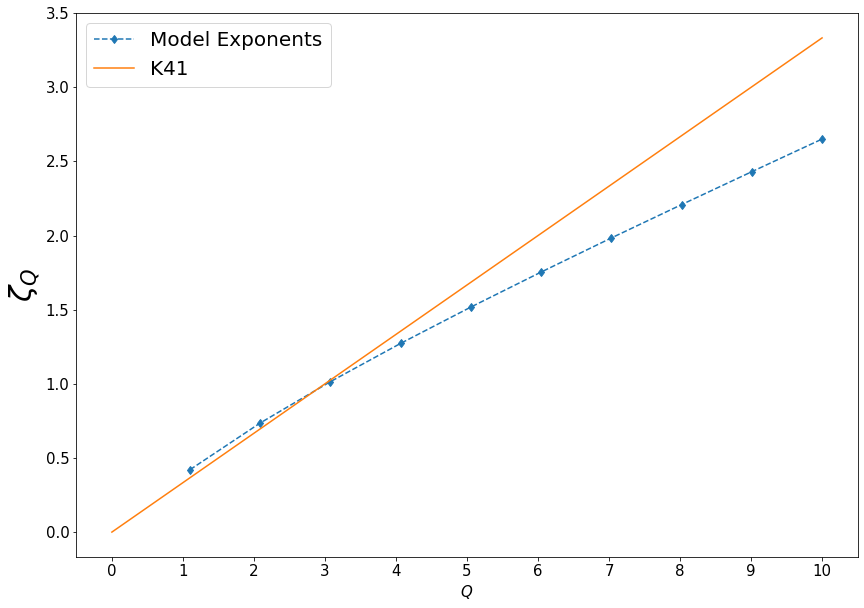

In [ ]:

sn1=["%.3f" % S1f.slope,"%.3f" %S2f.slope,"%.3f" %S3f.slope,"%.3f" %S4f.slope,"%.3f" %S5f.slope,"%.3f" %S6f.slope,"%.3f" %S7f.slope,"%.3f" %S8f.slope,"%.3f" %S9f.slope,"%.3f" %S10f.slope]
sn1=-np.array(sn1).astype('float')
x1=np.linspace(1.1,10,10)
x=np.linspace(0,10,10)

plt.figure(figsize = (14,10))
plt.plot(x1,sn1,'d--',label='Model Exponents')
plt.plot(x,x*(1/3),label='K41')
plt.xticks(np.arange(0,11))
plt.xlabel(r'$Q$',fontsize=15)
plt.ylabel(r'$\zeta_Q$',fontsize=30)
plt.legend(fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()


**Save And Show Scaling Exponents with FIT errors**

In [ ]:
Sfunctions1=pd.DataFrame(data=(S1f,S2f,S3f,S4f,S5f,S6f,S7f,S8f,S9f,S10f),index=np.arange(0,10))
display(Sfunctions1)

,slope,intercept,rvalue,pvalue,stderr
0,-0.421432,-2.431909,-0.996065,7.378161e-12,0.011857
1,-0.736352,-4.714392,-0.998003,2.493505e-13,0.014738
2,-1.014530,-6.859914,-0.997695,5.105018e-13,0.021821
3,-1.272784,-8.879118,-0.997150,1.473250e-12,0.030451
4,-1.518166,-10.788266,-0.996614,3.485466e-12,0.039608
5,-1.754453,-12.606180,-0.996149,6.625662e-12,0.048830
6,-1.984204,-14.351637,-0.995790,1.033834e-11,0.057756
7,-2.209320,-16.041118,-0.995542,1.376096e-11,0.066190
8,-2.431148,-17.688103,-0.995384,1.637179e-11,0.074123
9,-2.650558,-19.303211,-0.995288,1.815886e-11,0.081661


**Critical Exponents Model VS Critical Exponents Toschi [article](https://arxiv.org/abs/2202.09289)**


In [ ]:
#VALUES FROM TOSCHI# https://arxiv.org/abs/2202.09289

sn_SHE_Leveque=np.array([0.3640,0.6959,1.0000,1.2797,1.5380,1.7778,2.0013,2.2105,2.4074,2.5934])         #Theoretical
sn_FRM        =np.array([0.423,0.78,1.10,1.38,1.64,1.89,2.11,2.33,2.54,2.74])                            #Full Resolved Model-Toschi

#VALORI FROM L VOV# 
sn_LVOV=np.array([0.3936,0.7206,1.0036,1.2566,1.4886,1.7066,1.9106])



In [ ]:
a=-Sfunctions1.iloc[:,0]  # load exponents 

df=pd.DataFrame(data=(a,sn_SHE_Leveque,sn_FRM),index=['fit','SHE_Leveque','FullResolved'])  # put exponent in a dataframe
df.columns =[list(np.arange(1,11))]
display(df)

,1,2,3,4,5,6,7,8,9,10
fit,0.421432,0.736352,1.01453,1.272784,1.518166,1.754453,1.984204,2.20932,2.431148,2.650558
SHE_Leveque,0.364000,0.695900,1.00000,1.279700,1.538000,1.777800,2.001300,2.21050,2.407400,2.593400
FullResolved,0.423000,0.780000,1.10000,1.380000,1.640000,1.890000,2.110000,2.33000,2.540000,2.740000


**Theoretical Exponent VS Model Exponents**

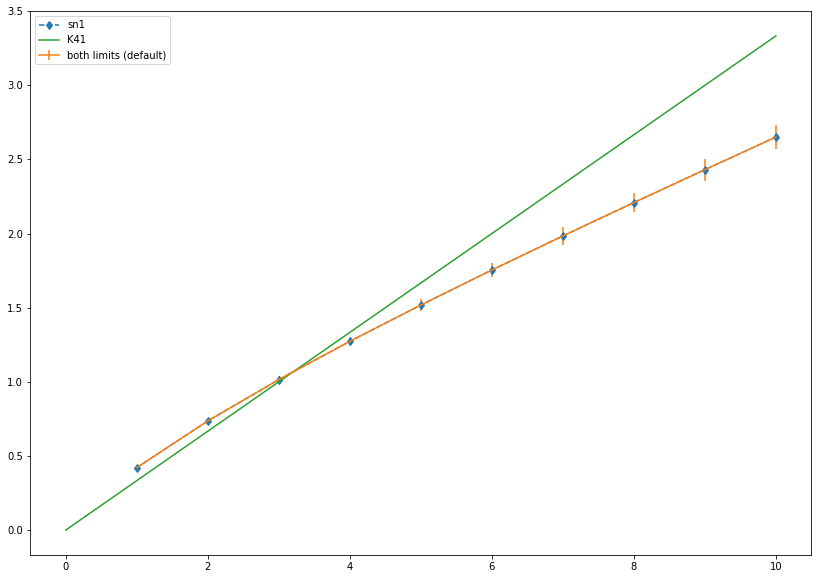

In [ ]:
plt.figure(figsize=(14,10))
x1=np.linspace(1,10,10)
x=np.linspace(0,10,10)
#plt.plot(x1,sn_SHE_Leveque,'d--',label='Leveque')
plt.plot(x1,sn1,'d--',label='sn1')
plt.errorbar(x1, sn1, yerr=Sfunctions1['stderr'], label='model critical exponents')
#plt.plot(x1,sn2,'d--',label='sn2')
#plt.plot(x1,sn_FRM,'d--',label='FRM')
plt.plot(x,x*(1/3),label='K41')
plt.legend(fontsize=20)
plt.show()

In [ ]:
test1=np.sum(np.power(sn1-sn_SHE_Leveque,2))
test2=np.sum(np.power(sn2-sn_SHE_Leveque,2))

test3=np.sum(np.power(sn1-sn_FRM,2))
test4=np.sum(np.power(sn2-sn_FRM,2))

test5=np.sum(np.power(sn1[:7]-sn_LVOV,2))
test6=np.sum(np.power(sn2[:7]-sn_LVOV,2))

print('leveque 1 ',np.round(test1,4),'leveque 2 ',np.round(test2,4),'\nFRM_toschi 1 ',np.round(test3,4),'FRM_toschi 2 ',np.round(test4,4),'\nLVOL 1 ',np.round(test5,4),'LVOV 2 ',np.round(test6,4))

NameError: ignored

In [ ]:
print(np.power(sn1-sn_SHE_Leveque,2))
print(np.power(sn2-sn_SHE_Leveque,2))

[3.24900e-03 1.60801e-03 2.25000e-04 4.48900e-05 4.00000e-04 5.66440e-04
 2.99290e-04 2.25000e-06 5.56960e-04 3.31776e-03]
[1.12360e-02 7.76161e-03 2.70400e-03 2.65690e-04 1.21000e-04 7.72840e-04
 1.24609e-03 1.05625e-03 3.76360e-04 2.56000e-06]
